## Estatísticas

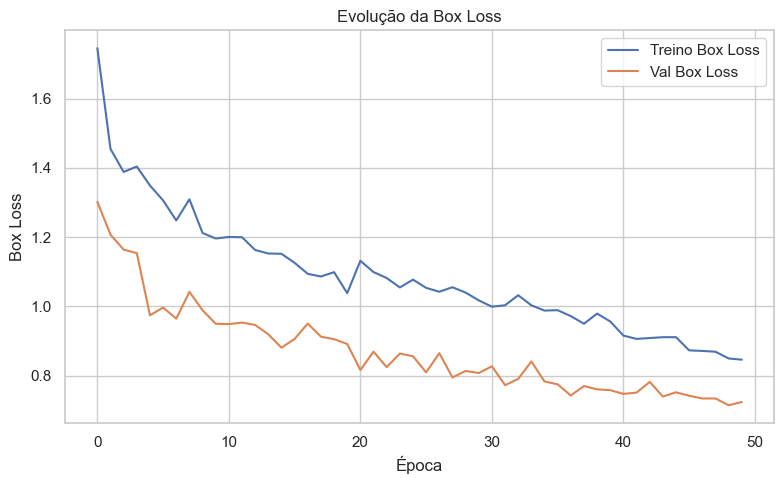

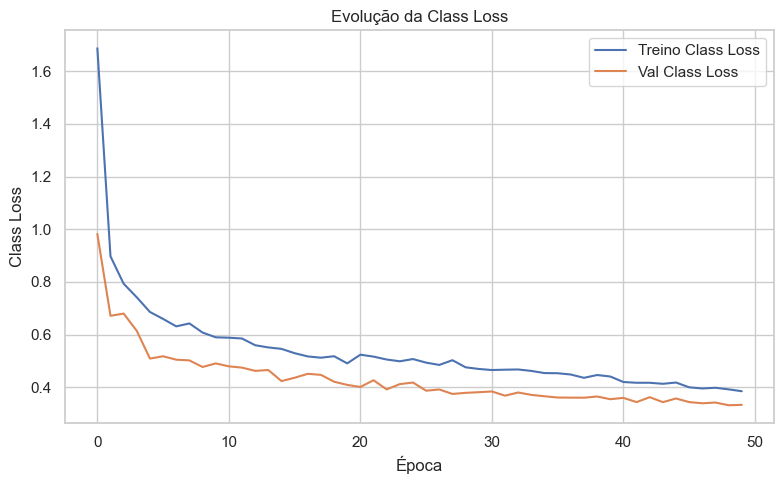

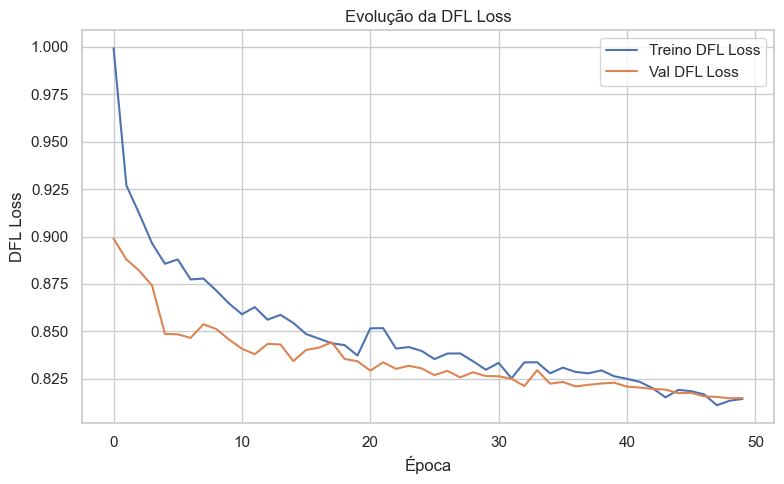

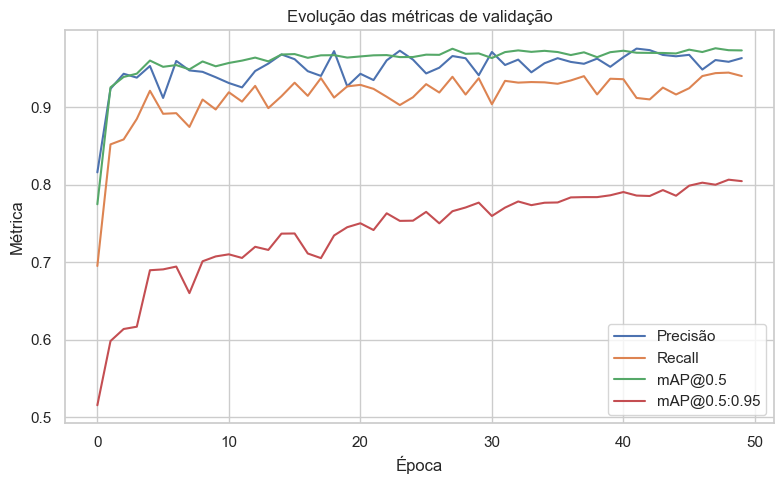

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ultralytics import YOLO

# ==============================
# Configuração de estilo
# ==============================
sns.set_theme(style="whitegrid")

# ==============================
# 1. Gráficos a partir do results.csv
# ==============================
results_path = "../runs/detect/train/results.csv"  # ajuste se necessário
df = pd.read_csv(results_path)

# --- Box Loss ---
plt.figure(figsize=(8, 5))
sns.lineplot(x=df.index, y=df['train/box_loss'], label="Treino Box Loss")
sns.lineplot(x=df.index, y=df['val/box_loss'], label="Val Box Loss")
plt.xlabel("Época")
plt.ylabel("Box Loss")
plt.title("Evolução da Box Loss")
plt.legend()
plt.tight_layout()
plt.show()

# --- Class Loss ---
plt.figure(figsize=(8, 5))
sns.lineplot(x=df.index, y=df['train/cls_loss'], label="Treino Class Loss")
sns.lineplot(x=df.index, y=df['val/cls_loss'], label="Val Class Loss")
plt.xlabel("Época")
plt.ylabel("Class Loss")
plt.title("Evolução da Class Loss")
plt.legend()
plt.tight_layout()
plt.show()

# --- DFL Loss ---
plt.figure(figsize=(8, 5))
sns.lineplot(x=df.index, y=df['train/dfl_loss'], label="Treino DFL Loss")
sns.lineplot(x=df.index, y=df['val/dfl_loss'], label="Val DFL Loss")
plt.xlabel("Época")
plt.ylabel("DFL Loss")
plt.title("Evolução da DFL Loss")
plt.legend()
plt.tight_layout()
plt.show()

# --- Métricas de validação ---
plt.figure(figsize=(8, 5))
sns.lineplot(x=df.index, y=df['metrics/precision(B)'], label="Precisão")
sns.lineplot(x=df.index, y=df['metrics/recall(B)'], label="Recall")
sns.lineplot(x=df.index, y=df['metrics/mAP50(B)'], label="mAP@0.5")
sns.lineplot(x=df.index, y=df['metrics/mAP50-95(B)'], label="mAP@0.5:0.95")
plt.xlabel("Época")
plt.ylabel("Métrica")
plt.title("Evolução das métricas de validação")
plt.legend()
plt.tight_layout()
plt.show()

In [2]:
# ==============================
# 2. Avaliação final com best.pt
# ==============================
model = YOLO("../runs/detect/train/weights/best.pt")
metrics = model.val(split="val")  # ou split="test"
class_metrics = [metrics.class_result(i) for i in range(len(metrics.names))]

Ultralytics 8.3.183  Python-3.13.7 torch-2.8.0+cu129 CUDA:0 (NVIDIA GeForce GTX 1660 SUPER, 6144MiB)
YOLOv5s summary (fused): 84 layers, 9,112,697 parameters, 0 gradients, 23.8 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 235.736.1 MB/s, size: 26.0 KB)


val: Scanning C:\Users\Usuario\Desktop\Faculdade\LabelStudio\dataset\valid\labels.cache... 49 images, 0 backgrounds, 0 corrupt: 100%|██████████| 49/49 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00:00,  2.19it/s]


                   all         49        725      0.959      0.945      0.974      0.807
                Bullet         35        524      0.926      0.856      0.941      0.684
                 Enemy         46        153      0.966          1      0.995      0.877
                Player         48         48      0.984      0.979      0.985      0.858
Speed: 1.4ms preprocess, 10.3ms inference, 0.0ms loss, 10.8ms postprocess per image
Results saved to c:\Users\Usuario\Desktop\Faculdade\GameBots\runs\detect\val


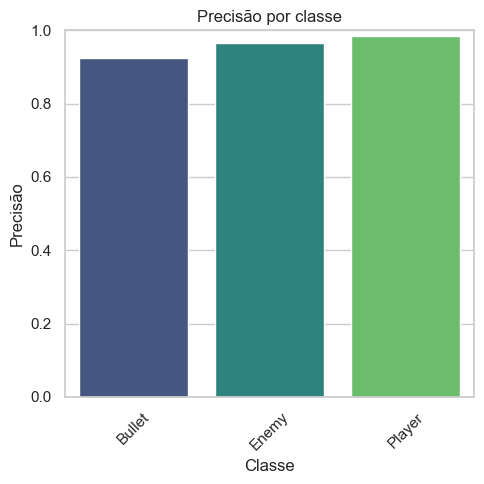

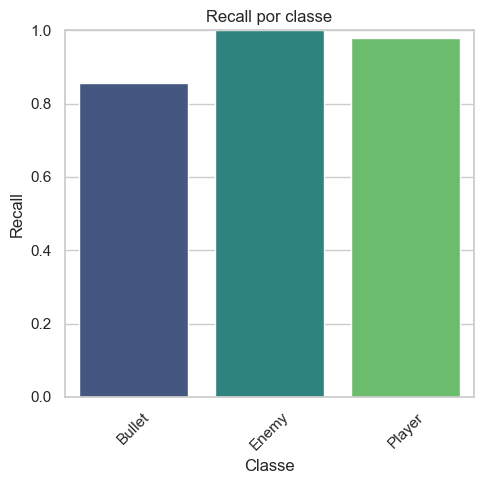

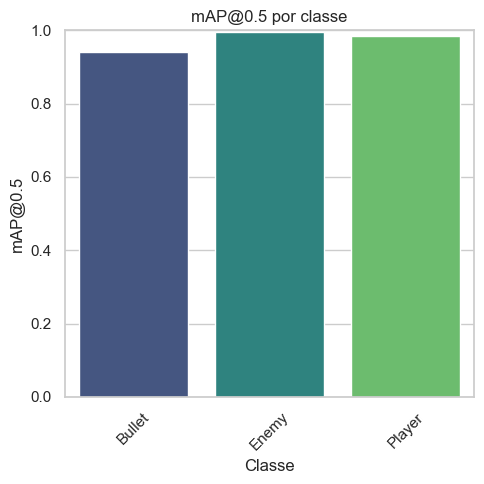

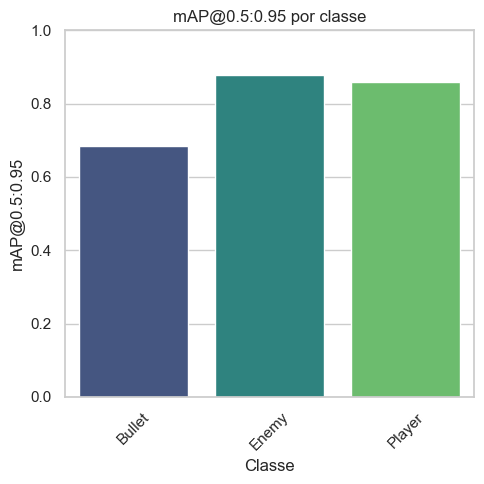

In [3]:
# ==============================
# 3. Métricas por classe em gráfico de barras
# ==============================
df_classes = pd.DataFrame(class_metrics, columns=["Precisão", "Recall", "mAP@0.5", "mAP@0.5:0.95"])
df_classes["Classe"] = list(metrics.names.values())

# Plotar gráficos de barras para cada métrica
for col in ["Precisão", "Recall", "mAP@0.5", "mAP@0.5:0.95"]:
    plt.figure(figsize=(5, 5))
    sns.barplot(data=df_classes, x="Classe", y=col, hue="Classe", dodge=False, palette="viridis")
    plt.title(f"{col} por classe")
    plt.xticks(rotation=45)
    plt.ylim(0, 1)
    plt.tight_layout()
    plt.show()


In [4]:
# ==============================
# 4. Resumo final em tabela LaTeX
# ==============================
results_dict = metrics.results_dict
resumo_all = {
    "Classe": "Todas",
    "Precisão": results_dict['metrics/precision(B)'],
    "Recall": results_dict['metrics/recall(B)'],
    "mAP@0.5": results_dict['metrics/mAP50(B)'],
    "mAP@0.5:0.95": results_dict['metrics/mAP50-95(B)']
}

df_resumo = pd.concat([pd.DataFrame([resumo_all]), df_classes], ignore_index=True)

print("\n=== Métricas finais (ALL + por classe) ===")
print(df_resumo)

# --- 5. Exportar tabela LaTeX ---
print("\n=== Tabela LaTeX ===")
print(df_resumo.to_latex(index=False, float_format="%.3f"))


=== Métricas finais (ALL + por classe) ===
   Classe  Precisão    Recall   mAP@0.5  mAP@0.5:0.95
0   Todas  0.958552  0.945010  0.973613      0.806588
1  Bullet  0.925692  0.855862  0.941290      0.684431
2   Enemy  0.966398  1.000000  0.994740      0.876956
3  Player  0.983566  0.979167  0.984809      0.858375

=== Tabela LaTeX ===
\begin{tabular}{lrrrr}
\toprule
Classe & Precisão & Recall & mAP@0.5 & mAP@0.5:0.95 \\
\midrule
Todas & 0.959 & 0.945 & 0.974 & 0.807 \\
Bullet & 0.926 & 0.856 & 0.941 & 0.684 \\
Enemy & 0.966 & 1.000 & 0.995 & 0.877 \\
Player & 0.984 & 0.979 & 0.985 & 0.858 \\
\bottomrule
\end{tabular}



[[435   0   0  25]
 [  0 153   0   4]
 [  0   0  47   0]
 [ 89   0   1   0]]


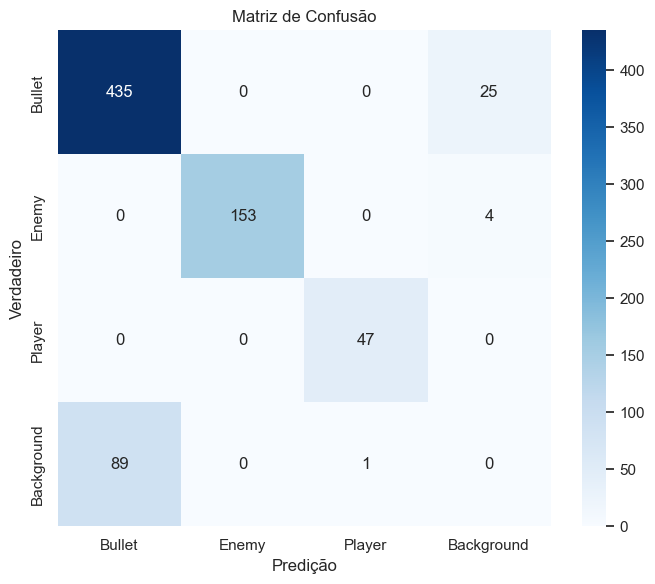

In [10]:
# ==============================
# 5. Matriz de Confusão
# ==============================
cm = metrics.confusion_matrix.matrix.astype(int)
labels_cm = list(metrics.names.values())

# Se houver mais linhas/colunas na matriz que labels, adiciona "Background"
if cm.shape[0] > len(labels_cm):
    labels_cm.append("Background")

print(cm)
plt.figure(figsize=(7, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=labels_cm, yticklabels=labels_cm)
plt.xlabel("Predição")
plt.ylabel("Verdadeiro")
plt.title("Matriz de Confusão")
plt.tight_layout()
plt.show()